**Loading Libraries**

In [1]:
import pyforest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

**Question: 1**

**I**

In [2]:
df=pd.read_csv("data.csv")

<IPython.core.display.Javascript object>

In [3]:
df.head() #load the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape #check the shape of the dataset

(569, 33)

In [5]:
df.isnull().sum() #checking for null values

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.drop("Unnamed: 32", axis=1, inplace=True)# Handling missing values by dropping the "Unnamed: 32" column
df.drop("id", axis=1, inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
Target=df['diagnosis']# Identify dependent variables (features)
X = df.drop("diagnosis", axis=1) # inDependent variable

In [9]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
Target.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

**II**

In [11]:
scaler = StandardScaler() #Scaling the database
X_scaled = scaler.fit_transform(X)
X_df=pd.DataFrame(X_scaled, columns=X.columns)

<IPython.core.display.Javascript object>

In [12]:
X_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [13]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

<IPython.core.display.Javascript object>

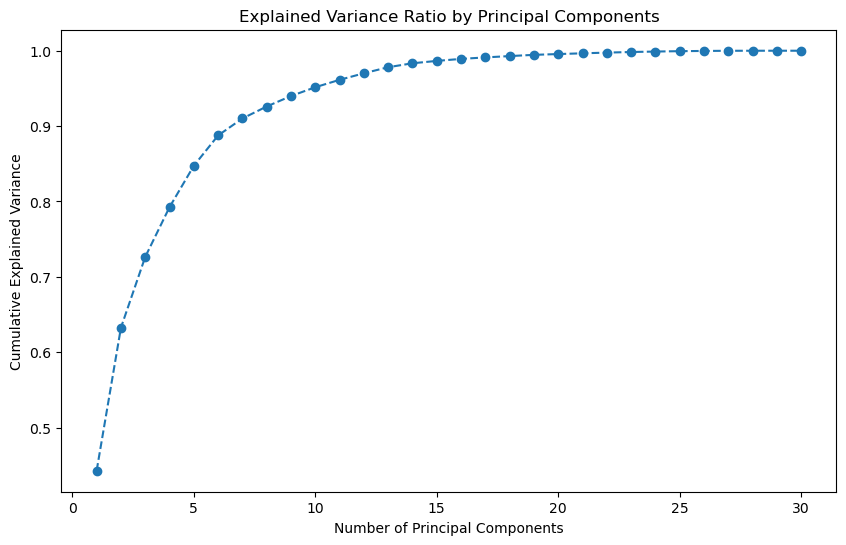

In [14]:
# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [15]:
pca = PCA(n_components=3)  # Performing PCA to reduce dimensionality 
X_pca = pca.fit_transform(X_df)

In [16]:
df_pca = pd.DataFrame(data=X_pca, columns=[f"PC{i}" for i in range(1, 4)])

<IPython.core.display.Javascript object>

In [17]:
df_pca["diagnosis"] = df["diagnosis"]

In [18]:
df_pca.head()

,PC1,PC2,PC3,diagnosis
0,9.192837,1.948583,-1.123172,M
1,2.387802,-3.768172,-0.529298,M
2,5.733896,-1.075174,-0.551748,M
3,7.122953,10.275589,-3.232794,M
4,3.935302,-1.948071,1.389761,M


<IPython.core.display.Javascript object>

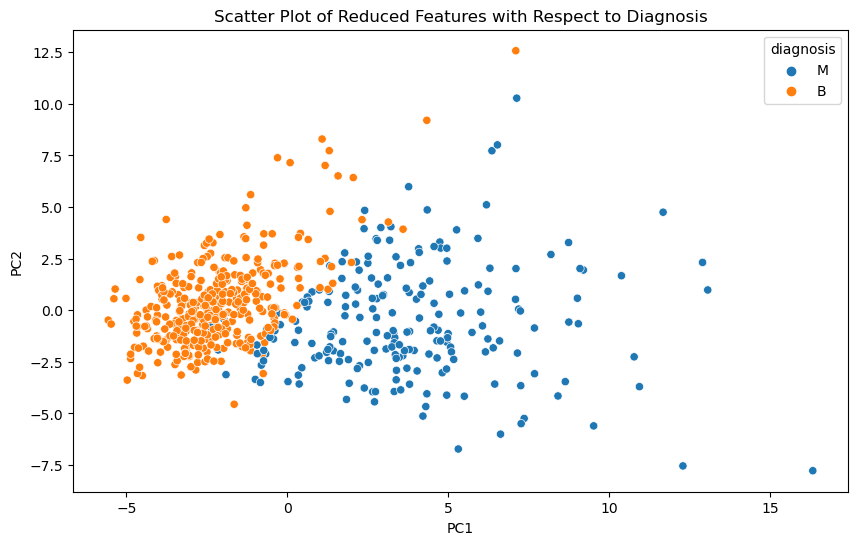

In [19]:
plt.figure(figsize=(10, 6)) # Plotting the scatterplot
sns.scatterplot(x="PC1", y="PC2", hue="diagnosis", data=df_pca)
plt.title("Scatter Plot of Reduced Features with Respect to Diagnosis")
plt.show()

In [20]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, df["diagnosis"], test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [21]:
logistic_reg = LogisticRegression() #training the model
logistic_reg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

LogisticRegression()

In [22]:
y_pred = logistic_reg.predict(X_test)# Making predictions

In [23]:
# Calculating accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.98
Precision: 1.00
Recall: 0.95


**Question:-2**

**I**

In [24]:
df2=pd.read_csv("SleepQual classification.csv") #Loading the dataset

<IPython.core.display.Javascript object>

In [25]:
df2.head()

,subject,day,duration in bed (minutes),in bed time,out bed time,actual sleep duration (minutes),sleep onset latency (minutes),in bed awake duration (minutes),efficiency (%),light sleep duration (minutes),deep sleep durarion (minutes),REM duration(minutes),awake percentage(%),ight sleep percentage (%),deep sleep percentage (%),REM percentage(%),label
0,1.0,1,518,9.050000,0.738194,455,29.0,58,88.0,270.0,65,125.0,11.0,57.0,12.548263,24.0,0
1,NaN,2,360,0.457639,0.707639,320,10.0,40,89.0,150.0,120,50.0,5.0,41.6,33.300000,13.8,0
2,NaN,3,504,0.349306,0.699306,453,23.0,46,90.0,267.0,56,135.0,9.0,54.0,11.111111,26.0,0
3,NaN,4,518,0.433333,0.792361,449,32.5,65,87.0,258.0,54,140.0,12.0,51.0,10.424710,27.0,1
4,NaN,5,403,0.514583,0.794444,358,21.0,42,89.0,211.0,56,94.0,10.0,54.0,13.895782,23.0,1


In [26]:
df2.shape #Checking the shape

(168, 17)

In [27]:
df2.isnull().sum() #Checking for the null values

subject                            144
day                                  0
duration in bed (minutes)            0
in bed time                          0
out bed time                         0
actual sleep duration (minutes)      0
sleep onset latency (minutes)        0
in bed awake duration (minutes)      0
efficiency (%)                       0
light sleep duration (minutes)       0
deep sleep durarion (minutes)        0
REM duration(minutes)                0
awake percentage(%)                  0
ight sleep percentage (%)            0
deep sleep percentage (%)            0
REM percentage(%)                    0
label                                0
dtype: int64

In [28]:
x=df2.drop(['subject', 'day', 'label'], axis=1) # Dropping unnecessary columns

In [29]:
y=df2['label'] #Dependent Variable

**II**

In [30]:
# Standardizing the dataset
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(x)

In [31]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Y_scaled, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
#Predicting
y_pred = knn_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

<IPython.core.display.Javascript object>

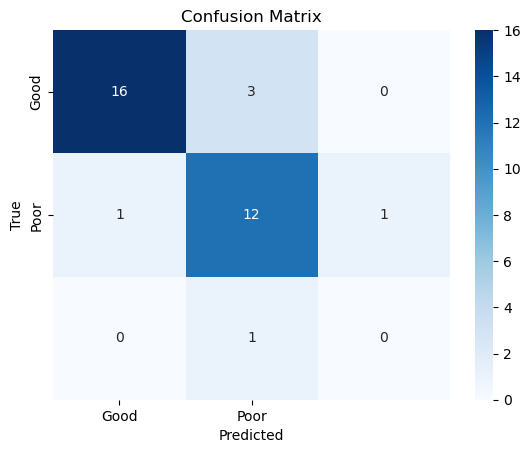

In [34]:
#Plotting the Confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Good', 'Poor'], yticklabels=['Good', 'Poor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.82
F1 Score: 0.83


**III**

In [36]:
pca = PCA()
Y_pca = pca.fit_transform(Y_scaled)

<IPython.core.display.Javascript object>

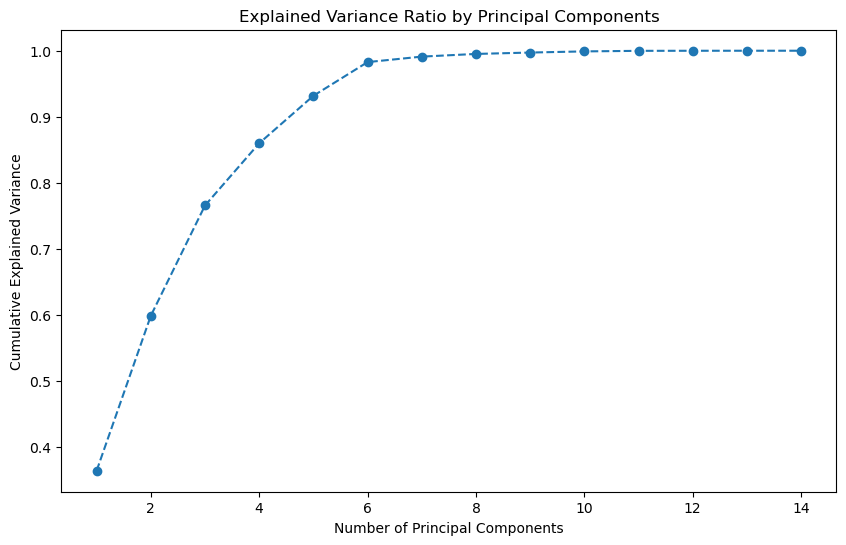

In [37]:
# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [38]:
# II. PCA to reduce dataset to 5 dimensions
pca = PCA(n_components=5)
Y_reduced = pca.fit_transform(Y_scaled)

In [39]:
df2_pca = pd.DataFrame(data=Y_reduced, columns=[f"PC{i}" for i in range(1, 6)])

<IPython.core.display.Javascript object>

In [40]:
df2_pca["label"] = df2["label"]

In [41]:
df2_pca.head()

,PC1,PC2,PC3,PC4,PC5,label
0,-0.186292,4.016992,-1.009511,-3.552099,10.122514,0
1,1.539795,0.557624,4.286749,-2.529455,0.785977,0
2,0.032506,1.976374,-1.036230,-1.275545,0.482522,0
3,0.927533,3.149063,-1.327440,-1.548312,0.652649,1
4,1.166460,1.168897,-0.116053,-1.430141,1.399633,1


<IPython.core.display.Javascript object>

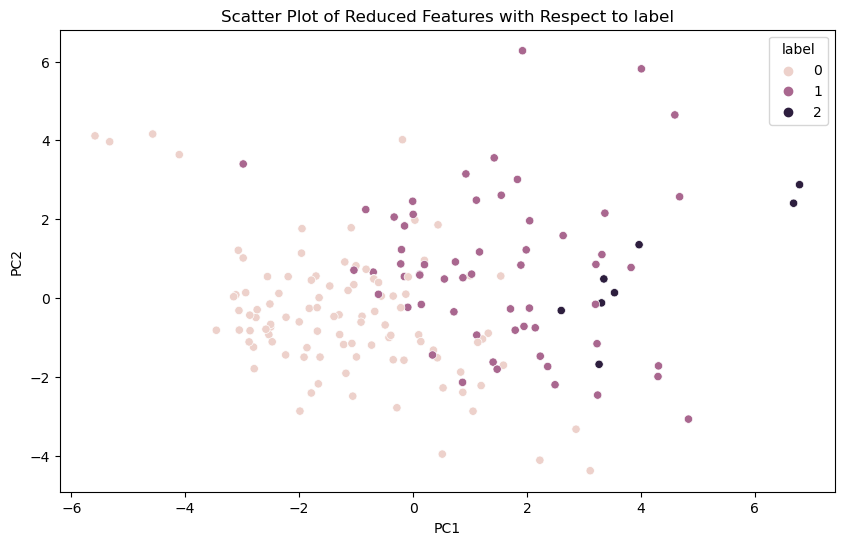

In [42]:
plt.figure(figsize=(10, 6)) # Plotting the scatterplot
sns.scatterplot(x="PC1", y="PC2", hue="label", data=df2_pca)
plt.title("Scatter Plot of Reduced Features with Respect to label")
plt.show()

**IV**

In [43]:
# Split the reduced dataset
X_train_reduced, X_test_reduced, _, _ = train_test_split(Y_reduced, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [44]:
# III. K-NN classifier on reduced dataset
knn_classifier_reduced = KNeighborsClassifier(n_neighbors=5)
knn_classifier_reduced.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [45]:
# Predict and evaluate on reduced dataset
y_pred_reduced = knn_classifier_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
f1_reduced = f1_score(y_test, y_pred_reduced, average='weighted')

In [46]:
print(f"\nAccuracy after dimensionality reduction: {accuracy_reduced:.2f}")
print(f"F1 Score after dimensionality reduction: {f1_reduced:.2f}")


Accuracy after dimensionality reduction: 0.79
F1 Score after dimensionality reduction: 0.80


In [47]:
# IV. Report the difference in accuracy and F1-score
accuracy_difference = accuracy - accuracy_reduced
f1_difference = f1 - f1_reduced

print(f"\nDifference in Accuracy: {accuracy_difference:.2f}")
print(f"Difference in F1 Score: {f1_difference:.2f}")


Difference in Accuracy: 0.03
Difference in F1 Score: 0.03
